## Matching previously blocked dataset

Following the instructons you should have checked out the project and started jupyter notebook in the parent folder.
```
uni-sofia-entity-linking-magellan    <= "jupyter notebook" started here
 |- datasets
 |- notebooks
    |- entity_match_electronics.ipynb
```
 

In [257]:
# Import py_entitymatching package
import py_entitymatching as em
import os
import pandas as pd

In [258]:
# Read the CSV files and set 'ID' as the key attribute
A = em.read_csv_metadata("../dataset/amazon_new_features.csv", key='ID')
B = em.read_csv_metadata("../dataset/best_buy_new_features.csv", key='ID')

## Adding price feature manually to improve matching

In [259]:
import re
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
def clean_price(s):
    s = str(s)
    s = re.sub('\$', '',s)
    s = re.sub(',', '',s)
    return float(s) if isfloat(s) else 0
A['Price_num'] = A['Amazon_Price'].fillna("0").apply(clean_price)
B['Price_num'] = B['Price'].fillna("0").apply(clean_price)

In [260]:
A.head(1)

,ID,Brand,Name,Amazon_Price,Original_Price,Features,Parameters,tfidf,Price_num
0,1,Asus,"ASUS X205TA 11.6 Inch Laptop (Intel Atom, 2 GB, 32GB SSD, Gold) - Free Upgrade to Windows 10",$199.00,NaN,Intel Atom 1.33 GHz Processor. 2 GB DDR3 RAM. 32GB SSD Storage; No Optical Drive. 11.6 inches 13...,X205TA 11.6 2 32GB 10 1.33 2 DDR3 32GB 11.6 1366 768 8.1,inch upgrade x205ta asus ssd,199.0


In [261]:
B.head(1)

,ID,Brand,Name,Price,Description,Features,Parameters,tfidf,Price_num
0,1,Asus,Asus 11.6 Laptop Intel Atom 2GB Memory 32GB Flash Storage Blue X205TA-SATM0404G,$189.99,"11.6&#34; Laptop - Intel Atom - 2GB Memory - 32GB Flash Storage, Read customer reviews and buy o...","Microsoft Windows 8.1 operating system preinstalled,Intel?? Atom??? processor Z3735F,2GB DDR3L m...",11.6 2GB 32GB X205TA SATM0404G 11.6 2GB 32GB 8.1 Z3735F 2GB DDR3L 11.6 32GB 0.3MP 2 2.0 802.11a ...,satm0404g x205ta asus atom storage,189.99


In [262]:
A.describe()

,ID,Price_num
count,4259.000000,4259.000000
mean,2130.308758,243.489845
std,1229.981467,425.799625
min,1.000000,0.000000
25%,1065.500000,9.990000
50%,2130.000000,26.130000
75%,3195.500000,359.990000
max,4260.000000,4072.990000


In [263]:
B.describe()

,ID,Price_num
count,5001.000000,5001.000000
mean,2501.000000,352.049156
std,1443.808678,512.326929
min,1.000000,0.000000
25%,1251.000000,33.990000
50%,2501.000000,109.990000
75%,3751.000000,450.490000
max,5001.000000,3977.990000


## Adding screen size feature manually to improve matching

In [264]:
import re

def guess_screen_size(s):
    s = str(s).lower()
    if "19.5" in s: return "19"
    
    if "18.4" in s: return "18"
    
    if "17.3" in s: return "17"
    if "17-in" in s: return "17"
    
    if "16 in" in s: return "16"
    if "16-in" in s: return "16"
    
    if "15.4" in s: return "15"
    if "15.5" in s: return "15"
    if "15\\" in s: return "15"
    if "15-" in s: return "15"
    if "15.6" in s: return "15"
    if "15-in" in s: return "15"
    
    if "14\\" in s: return "14"
    if "14.1" in s: return "14"
    if "14-in" in s: return "14"
    if "14" in s: return "14"
    
    if "13.3" in s: return "13"
    if "13.5" in s: return "13"
    if "13-in" in s: return "13"
    
    if "12-in" in s: return "12"
    if "12.5" in s: return "12"
    if "12.1" in s: return "12"
    if "12.3" in s: return "12"
    if "12&#34;" in s: return "12"
    if "11-in" in s: return "11"
    if "11.6" in s: return "11"
    if "10-in" in s: return "10"
    if "10.1" in s: return "10"
    
    return "none"
A['Screen'] = (A['Name'] + ' ' + A['Features'].fillna("")).apply(guess_screen_size)
B['Screen'] = (B['Name']+' '+ B['Description'].fillna("")+' '+ B['Features'].fillna("")).apply(guess_screen_size)

In [265]:
print("Laptops from `A` without scrrensize:", \
      len(A[(A['Screen']=='none') & (A['Price_num'] > 200)]))

Laptops from `A` without scrrensize: 18


In [266]:
print("Laptops from `B` without scrrensize:", \
      len(B[(B['Screen']=='none') & (B['Price_num'] > 200)]))

Laptops from `B` without scrrensize: 126


<AxesSubplot:>

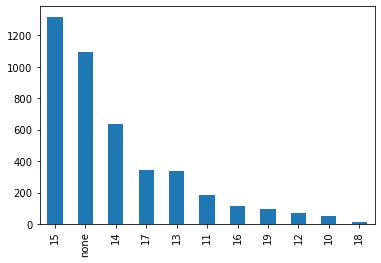

In [267]:
A['Screen'].value_counts().plot(kind='bar')

<AxesSubplot:>

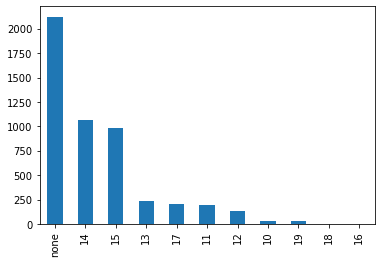

In [268]:
B['Screen'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Price_num'}>]], dtype=object)

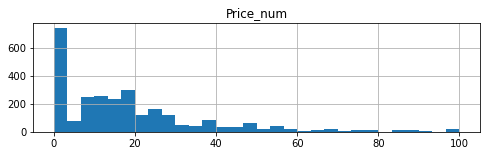

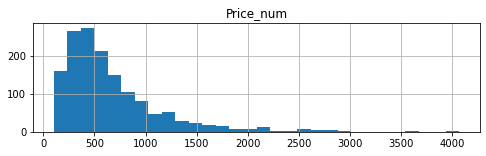

In [299]:
# Price histogram of A
A[A['Price_num'] < 100].hist(column = 'Price_num', bins = 30, figsize = (8, 2))
A[A['Price_num'] > 100].hist(column = 'Price_num', bins = 30, figsize = (8, 2))


array([[<AxesSubplot:title={'center':'Price_num'}>]], dtype=object)

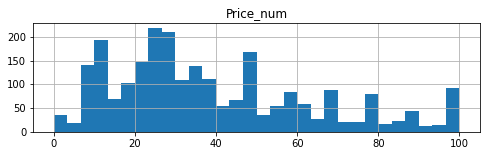

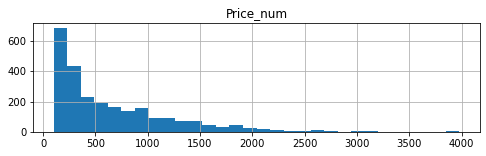

In [300]:
# Price histogram of B
B[B['Price_num'] < 100].hist(column = 'Price_num', bins = 30, figsize = (8, 2))
B[B['Price_num'] > 100].hist(column = 'Price_num', bins = 30, figsize = (8, 2))


In [271]:

# Load the pre-labeled data
G = em.read_csv_metadata('../dataset/sample_blocked_500_labeled.csv', 
                         key='_id',
                         ltable=A, rtable=B, 
                         fk_ltable='ltable_ID', fk_rtable='rtable_ID')

print (f"len(G)={len(G)}, labeled={G['label'].value_counts()[1]}")


Metadata file is not present in the given path; proceeding to read the csv file.


len(G)=500, labeled=37


In [272]:
G.head(3)

,Unnamed: 0,_id,ltable_ID,rtable_ID,ltable_Brand,ltable_Name,ltable_Amazon_Price,ltable_Original_Price,ltable_Features,ltable_Parameters,ltable_tfidf,rtable_Brand,rtable_Name,rtable_Price,rtable_Description,rtable_Features,rtable_Parameters,rtable_tfidf,label
0,4928,4928,4,124,HP,HP Chromebook 14 - New Version (Snow White),$339.99,NaN,"NVIDIA Tegra K1 Processor. 2 GB DDR3L SDRAM. 16 GB Solid-State Drive. 14-Inch Screen. Chrome, 8....",14 K1 2 DDR3L 16 14 8.0,new hp white chromebook 14,HP,HP Pavilion 15.6 Laptop AMD A10Series 8GB Memory 1TB Hard Drive Silver 15-ab161nr,$599.99,"Pavilion 15.6&#34; Laptop - AMD A10-Series - 8GB Memory - 1TB Hard Drive, Read customer reviews ...","Windows 10 operating system,15.6 display,AMD A10-8700P accelerated processor,8GB system memory f...",15.6 A10Series 8GB 1TB 15 ab161nr 15.6 A10 8GB 1TB 10 15.6 A10 8700P 8GB 1TB R6 4.89 0.99 2 3.0 ...,ab161nr a10series pavilion hp amd,0
1,6553,6553,7,570,Dell,"Dell Inspiron 11.6-Inch 2 in 1 Convertible Touchscreen Laptop, i3147-3750sLV",$371.14,$449.99,Intel Pentium Processor N3520 2.16GHz. 4 GB DDR3L SDRAM. 500 GB 7200 rpm Hard Drive. 11.6-Inch S...,11.6 2 1 i3147 3750sLV N3520 2.16GHz. 4 DDR3L 500 7200 11.6 8.1; 10,convertible inch dell inspiron 11,Dell,Dell Dell Latitude E5500 Laptop No Black E5500,$144.99,"Latitude E5500 Laptop Notebook-Core 2 Duo 2.0GHz-2GB DDR2-80GB-DVD+CDRW-Windows 7, Read customer...","Processor Manufacturer: Intel,Processor Type: Core 2 Duo,Processor Speed: 2 GHz,Processor Core: ...",E5500 E5500 E5500 2 2.0GHz 2GB DDR2 80GB 7 2 2 2 2 DDR2 80 15.4 16:10 4500MHD DDR2 802.11b 4 45 ...,e5500 dell latitude laptop black,0
2,7241,7241,8,408,Dell,"Super Power Supply? AC / DC Laptop Adapter Charger Cord for Dell XPS, Dell Inspiron P28F, P25F, ...",$18.89,NaN,Input: 110-220V Output: 19.5V 4.62A. Warranty: 1 Year. Super Power Supply? are manufactured and ...,P28F P25F P35G P17E P24G P30G P23F P04E M102z P19Ta P31G P37G P33G P37G P36F P26F P24E P15E 110 ...,plug cord dc netbook dell,Dell,Dell Inspiron 15.6 TouchScreen Laptop Intel Core i7 8GB Memory 1TB Hard Drive Silver I7558-4010BLK,$799.99,"Inspiron 15.6&#34; Touch-Screen Laptop - Intel Core i7 - 8GB Memory - 1TB Hard Drive, Read custo...","Microsoft Windows 8.1 operating system preinstalled,15.6 Full HD touch screen for hands-on contr...",15.6 i7 8GB 1TB I7558 4010BLK 15.6 i7 8GB 1TB 8.1 15.6 5th i7 5500U 8GB 1TB 4.8 0.78 4.0 2 3.0 1...,4010blk i7558 dell inspiron 1tb,0


## Splitting the labeled data into development and evaluation set


In this step, we split the labeled data into two sets: development (I) and evaluation (J). Specifically, the development set is used to come up with the best learning-based matcher and the evaluation set used to evaluate the selected matcher on unseen data.

In [273]:
# Split S into development set (I) and evaluation set (J)
IJ = em.split_train_test(G, train_proportion=0.75, random_state=0)
I = IJ['train']
J = IJ['test']

In [274]:
print(f"I[label==1] = {len(I[I['label'] == 1])}")
print(f"J[label==1] = {len(J[J['label'] == 1])}")

J.head(3)

I[label==1] = 27
J[label==1] = 10


,Unnamed: 0,_id,ltable_ID,rtable_ID,ltable_Brand,ltable_Name,ltable_Amazon_Price,ltable_Original_Price,ltable_Features,ltable_Parameters,ltable_tfidf,rtable_Brand,rtable_Name,rtable_Price,rtable_Description,rtable_Features,rtable_Parameters,rtable_tfidf,label
90,720174,720174,550,423,Lenovo,Lenovo Flex 3 14 (80R3000UUS) 14.0\ Laptop,$831.33,$849.99,"Intel Core i7-6500U 2.5 GHz. 8 GB DDR3L SDRAM. 1000 GB 5400 rpm Hard Drive. 14.0-Inch Screen, In...",3 14 80R3000UUS 14.0 i7 6500U 2.5 8 DDR3L 1000 5400 14.0 10 5,flex lenovo 14 laptop zseries,Lenovo,Lenovo Flex 3 2in1 11.6 TouchScreen Laptop Intel Celeron 4GB Memory 500GB Hard Drive Black Flex ...,$349.99,"Flex 3 2-in-1 11.6&#34; Touch-Screen Laptop - Intel Celeron - 4GB Memory - 500GB Hard Drive, Rea...","Windows 10 operating system,11.6 LCD 10-point multitouch screen,Intel?? Celeron?? processor N284...",3 2in1 11.6 4GB 500GB 3 11 80LX0026US 3 2 1 11.6 4GB 500GB 10 11.6 10 N2840 4GB 500GB 360?? 3.05...,flex 80lx0026us 11 lenovo celeron,0
254,2804508,2804508,1821,1773,Other,BRINCH? [Red] Deluxe Universal Fabric Portable thin Light Durable Waterproof Anti-tear 15 - 15.6...,NaN,NaN,"Bag Interior Size:380*290*35mm ,Exterior Size:390*300*40mm,fits 15.6\ Notebook/Macbook,Accesorie...",15 15.6 15 15.6 Size:380 290 35mm Size:390 300 40mm 15.6 Size:135 165 30mm. 15.6 X551MA SX018H C...,inch bag soft pouch computers,Other,Platinum Laptop Tote Bag Black PT-TBC02,$79.99,"Laptop Tote Bag, Read customer reviews and buy online at Best Buy.","Fits most laptops with up to a 15.6 display,Pockets,Canvas material,Sleeve,For use with your exi...",TBC02 15.6,tbc02 pt platinum tote bag,0
283,3453837,3453837,2208,1997,Other,"13 Inch Laptop Sleeve, 13 Inch Laptop Shoulder Bag, KOZMICC 13 13.3 Inch Neoprene Messenger (Bla...",$16.99,$26.99,Fits most 13 - 13.3 inch laptops from Dell HP Lenovo Acer ASUS Chromebook Samsung Apple Macbook ...,13 13 13 13.3 13 13.3 12.75 9.75,inch 13 strap neoprene messenger,Dell,Dell 13.3 Latitude Notebook 4 GB Memory 160 GB Hard Drive Black E4300,$198.91,"13.3 Latitude Notebook - 4 GB Memory - 160 GB Hard Drive, Read customer reviews and buy online a...","Processor Manufacturer: Intel,Processor Type: Core 2 Duo,Processor Speed: 2.40 GHz,Processor Cor...",13.3 4 160 E4300 13.3 4 160 2 2.40 2 4 DDR3 160 13.3 16:9 1366 768 DDR3 2 45 7,e4300 160 dell gb 13,0


## Selecting the best learning-based matcher 

Selecting the best learning-based matcher typically involves the following steps:

1. Creating a set of learning-based matchers
2. Creating features
3. Converting the development set into feature vectors
4. Selecting the best learning-based matcher using k-fold cross validation


In [275]:
# Create a set of ML-matchers
dt = em.DTMatcher(name='DecisionTree', random_state=0)
svm = em.SVMMatcher(name='SVM', random_state=0)
rf = em.RFMatcher(name='RF', random_state=0)
lg = em.LogRegMatcher(name='LogReg', random_state=0)
ln = em.LinRegMatcher(name='LinReg')

### Creating Features

Next, we need to create a set of features for the development set. *py_entitymatching* provides a way to automatically generate features based on the attributes in the input tables. For the purposes of this guide, we use the automatically generated features.

In [276]:
# Generate features
feature_table = em.get_features_for_matching(A, B, validate_inferred_attr_types=False)

In [277]:
feature_table.head(2)

,feature_name,left_attribute,right_attribute,left_attr_tokenizer,right_attr_tokenizer,simfunction,function,function_source,is_auto_generated
0,ID_ID_exm,ID,ID,None,None,exact_match,<function ID_ID_exm at 0x7ff576223e50>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
1,ID_ID_anm,ID,ID,None,None,abs_norm,<function ID_ID_anm at 0x7ff576179e50>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True


In [278]:
## We delete features involving the ID
feature_table = feature_table.drop(feature_table[feature_table['feature_name'].str.contains('ID_ID')].index)

In [279]:
# List the names of the features generated
feature_table['feature_name']

4                   Brand_Brand_jac_qgm_3_qgm_3
5               Brand_Brand_cos_dlm_dc0_dlm_dc0
6               Brand_Brand_jac_dlm_dc0_dlm_dc0
7                               Brand_Brand_mel
8                          Brand_Brand_lev_dist
9                           Brand_Brand_lev_sim
10                              Brand_Brand_nmw
11                               Brand_Brand_sw
12            Features_Features_jac_qgm_3_qgm_3
13        Features_Features_cos_dlm_dc0_dlm_dc0
14        Parameters_Parameters_jac_qgm_3_qgm_3
15    Parameters_Parameters_cos_dlm_dc0_dlm_dc0
16                  tfidf_tfidf_jac_qgm_3_qgm_3
17              tfidf_tfidf_cos_dlm_dc0_dlm_dc0
18              tfidf_tfidf_jac_dlm_dc0_dlm_dc0
19                              tfidf_tfidf_mel
20                         tfidf_tfidf_lev_dist
21                          tfidf_tfidf_lev_sim
22                              tfidf_tfidf_nmw
23                               tfidf_tfidf_sw
24                      Price_num_Price_

### Converting the Development Set to  Feature Vectors

In [280]:
# Convert the I into a set of feature vectors using I
H = em.extract_feature_vecs(I, 
                            feature_table=feature_table, 
                            attrs_after='label',
                            show_progress=True) 

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


In [281]:
# Display first few rows
H.head(3)

,_id,ltable_ID,rtable_ID,Brand_Brand_jac_qgm_3_qgm_3,Brand_Brand_cos_dlm_dc0_dlm_dc0,Brand_Brand_jac_dlm_dc0_dlm_dc0,Brand_Brand_mel,Brand_Brand_lev_dist,Brand_Brand_lev_sim,Brand_Brand_nmw,...,Price_num_Price_num_anm,Price_num_Price_num_lev_dist,Price_num_Price_num_lev_sim,Screen_Screen_lev_dist,Screen_Screen_lev_sim,Screen_Screen_jar,Screen_Screen_jwn,Screen_Screen_exm,Screen_Screen_jac_qgm_3_qgm_3,label
239,2471376,1641,1245,1.0,1.0,1.0,1.0,0.0,1.0,6.0,...,0.851336,3.0,0.500000,0.0,1.0,1.000000,1.0,1,1.000000,0
59,470161,350,1586,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.318791,4.0,0.333333,1.0,0.5,0.666667,0.7,0,0.142857,0
406,5333774,3325,1529,1.0,1.0,1.0,1.0,0.0,1.0,2.0,...,0.808899,5.0,0.166667,0.0,1.0,1.000000,1.0,1,1.000000,1


### Selecting the Best Matcher Using Cross-validation

Now, we select the best matcher using k-fold cross-validation. For the purposes of this guide, we use five fold cross validation and use 'precision' and 'recall' metric to select the best matcher.

In [282]:

# Select the best ML matcher using CV
result = em.select_matcher([dt, rf, svm, ln, lg], table=H, 
        exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'label'],
        k=8,
        target_attr='label', metric_to_select_matcher='precision', random_state=3)
result['cv_stats']

/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedM

/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

,Matcher,Average precision,Average recall,Average f1
0,DecisionTree,0.570437,0.479762,0.49375
1,RF,0.250000,0.059524,0.09375
2,SVM,0.000000,0.000000,0.00000
3,LinReg,0.000000,0.000000,0.00000
4,LogReg,0.062500,0.041667,0.05000


In [283]:
# Select the best ML matcher using CV
result = em.select_matcher([dt, rf, svm, ln, lg], table=H, 
        exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'label'],
        k=8,
        target_attr='label', metric_to_select_matcher='recall', random_state=42)
result['cv_stats']

/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedM

/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bobi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

,Matcher,Average precision,Average recall,Average f1
0,DecisionTree,0.354167,0.450000,0.386039
1,RF,0.375000,0.208333,0.250000
2,SVM,0.000000,0.000000,0.000000
3,LinReg,0.000000,0.000000,0.000000
4,LogReg,0.000000,0.000000,0.000000


### Converting the Evaluation Set to  Feature Vectors

As before, we convert to the feature vectors (using the feature table and the evaluation set)

In [284]:
# Convert J into a set of feature vectors using feature table
L = em.extract_feature_vecs(J, feature_table=feature_table,
                            attrs_after='label', show_progress=True)

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


### Training the Selected Matcher

In [285]:
len(L)

125

In [286]:
# Train using feature vectors from I 
dt.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'label'], 
       target_attr='label')

### Predicting the Matches

Next, we predict the matches for the evaluation set (using the feature vectors extracted from it).

In [287]:
# Predict on L 
predictions = dt.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'label'], 
              append=True, target_attr='predicted', inplace=False)

## False positives

In [288]:
predictions[(predictions['predicted']==1)&(predictions['label']==0)]

,_id,ltable_ID,rtable_ID,Brand_Brand_jac_qgm_3_qgm_3,Brand_Brand_cos_dlm_dc0_dlm_dc0,Brand_Brand_jac_dlm_dc0_dlm_dc0,Brand_Brand_mel,Brand_Brand_lev_dist,Brand_Brand_lev_sim,Brand_Brand_nmw,...,Price_num_Price_num_lev_dist,Price_num_Price_num_lev_sim,Screen_Screen_lev_dist,Screen_Screen_lev_sim,Screen_Screen_jar,Screen_Screen_jwn,Screen_Screen_exm,Screen_Screen_jac_qgm_3_qgm_3,label,predicted
15,84765,66,458,0.0,0.0,0.0,0.000000,6.0,0.000000,-4.0,...,5.0,0.166667,0.0,1.0,1.000000,1.0,1,1.000000,0,1
311,3857669,2466,833,0.0,0.0,0.0,0.472222,6.0,0.000000,-2.0,...,5.0,0.166667,0.0,1.0,1.000000,1.0,1,1.000000,0,1
76,639367,484,526,0.0,0.0,0.0,0.464286,6.0,0.142857,-2.0,...,3.0,0.500000,1.0,0.5,0.666667,0.7,0,0.142857,0,1
49,332464,253,893,1.0,1.0,1.0,1.000000,0.0,1.000000,4.0,...,5.0,0.166667,0.0,1.0,1.000000,1.0,1,1.000000,0,1


## False negatives

In [289]:
predictions[(predictions['predicted']==0)&(predictions['label']==1)]

,_id,ltable_ID,rtable_ID,Brand_Brand_jac_qgm_3_qgm_3,Brand_Brand_cos_dlm_dc0_dlm_dc0,Brand_Brand_jac_dlm_dc0_dlm_dc0,Brand_Brand_mel,Brand_Brand_lev_dist,Brand_Brand_lev_sim,Brand_Brand_nmw,...,Price_num_Price_num_lev_dist,Price_num_Price_num_lev_sim,Screen_Screen_lev_dist,Screen_Screen_lev_sim,Screen_Screen_jar,Screen_Screen_jwn,Screen_Screen_exm,Screen_Screen_jac_qgm_3_qgm_3,label,predicted
157,1374437,969,1076,1.0,1.0,1.0,1.0,0.0,1.0,2.0,...,4.0,0.333333,0.0,1.0,1.0,1.0,1,1.0,1,0
60,511179,386,442,1.0,1.0,1.0,1.0,0.0,1.0,2.0,...,2.0,0.666667,0.0,1.0,1.0,1.0,1,1.0,1,0


### Evaluating the Matching Output

Finally, we evaluate the accuracy of predicted outputs

In [290]:
# Evaluate the predictions
eval_result = em.eval_matches(predictions, 'label', 'predicted')
em.print_eval_summary(eval_result)

Precision : 66.67% (8/12)
Recall : 80.0% (8/10)
F1 : 72.73%
False positives : 4 (out of 12 positive predictions)
False negatives : 2 (out of 113 negative predictions)


In [291]:
G2 = em.read_csv_metadata('../dataset/all_candidates.csv', 
                         key='_id',
                         ltable=A, rtable=B, 
                         fk_ltable='ltable_ID', fk_rtable='rtable_ID')

Metadata file is not present in the given path; proceeding to read the csv file.


In [292]:
L = em.extract_feature_vecs(G2, feature_table=feature_table,
                           show_progress=True)

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:10:01


In [293]:
L

,_id,ltable_ID,rtable_ID,Brand_Brand_jac_qgm_3_qgm_3,Brand_Brand_cos_dlm_dc0_dlm_dc0,Brand_Brand_jac_dlm_dc0_dlm_dc0,Brand_Brand_mel,Brand_Brand_lev_dist,Brand_Brand_lev_sim,Brand_Brand_nmw,...,Price_num_Price_num_exm,Price_num_Price_num_anm,Price_num_Price_num_lev_dist,Price_num_Price_num_lev_sim,Screen_Screen_lev_dist,Screen_Screen_lev_sim,Screen_Screen_jar,Screen_Screen_jwn,Screen_Screen_exm,Screen_Screen_jac_qgm_3_qgm_3
0,0,1,1,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0,0.954724,3.0,0.500000,1.0,0.5,0.666667,0.7,0,0.142857
1,2,1,3,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0,0.265337,4.0,0.333333,1.0,0.5,0.666667,0.7,0,0.142857
2,15,1,16,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0,0.221357,1.0,0.800000,1.0,0.5,0.666667,0.7,0,0.142857
3,17,1,18,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0,0.153195,1.0,0.833333,1.0,0.5,0.666667,0.7,0,0.142857
4,21,1,22,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0,0.249061,1.0,0.800000,1.0,0.5,0.666667,0.7,0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282576,6855903,4260,4286,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0,0.399850,2.0,0.600000,0.0,1.0,1.000000,1.0,1,1.000000
282577,6855943,4260,4763,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0,0.319864,2.0,0.600000,4.0,0.0,0.000000,0.0,0,0.000000
282578,6855944,4260,4764,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0,0.319864,2.0,0.600000,4.0,0.0,0.000000,0.0,0,0.000000
282579,6855964,4260,4917,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0,0.320120,3.0,0.400000,4.0,0.0,0.000000,0.0,0,0.000000


In [294]:
# Predict on L 
predictions = dt.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID'], 
              append=True, target_attr='predicted', inplace=False)

In [295]:
predictions

,_id,ltable_ID,rtable_ID,Brand_Brand_jac_qgm_3_qgm_3,Brand_Brand_cos_dlm_dc0_dlm_dc0,Brand_Brand_jac_dlm_dc0_dlm_dc0,Brand_Brand_mel,Brand_Brand_lev_dist,Brand_Brand_lev_sim,Brand_Brand_nmw,...,Price_num_Price_num_anm,Price_num_Price_num_lev_dist,Price_num_Price_num_lev_sim,Screen_Screen_lev_dist,Screen_Screen_lev_sim,Screen_Screen_jar,Screen_Screen_jwn,Screen_Screen_exm,Screen_Screen_jac_qgm_3_qgm_3,predicted
0,0,1,1,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.954724,3.0,0.500000,1.0,0.5,0.666667,0.7,0,0.142857,1
1,2,1,3,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.265337,4.0,0.333333,1.0,0.5,0.666667,0.7,0,0.142857,0
2,15,1,16,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.221357,1.0,0.800000,1.0,0.5,0.666667,0.7,0,0.142857,0
3,17,1,18,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.153195,1.0,0.833333,1.0,0.5,0.666667,0.7,0,0.142857,0
4,21,1,22,1.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.249061,1.0,0.800000,1.0,0.5,0.666667,0.7,0,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282576,6855903,4260,4286,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.399850,2.0,0.600000,0.0,1.0,1.000000,1.0,1,1.000000,0
282577,6855943,4260,4763,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.319864,2.0,0.600000,4.0,0.0,0.000000,0.0,0,0.000000,0
282578,6855944,4260,4764,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.319864,2.0,0.600000,4.0,0.0,0.000000,0.0,0,0.000000,0
282579,6855964,4260,4917,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.320120,3.0,0.400000,4.0,0.0,0.000000,0.0,0,0.000000,0


In [301]:
K = predictions[predictions['predicted'] == 1]
print(f"len(K)={len(K)}")

len(K)=22615


In [297]:
Z = K.merge(A, left_on='ltable_ID', right_on='ID') \
.merge(B, left_on = 'rtable_ID', right_on = 'ID')[['ID_x','Name_x', 'Name_y']].drop_duplicates(subset=['ID_x'], keep=False)
Z

,ID_x,Name_x,Name_y
90,3422,iPearl mCover Hard Shell Case for 11.6\ ASUS EeeBook X205TA series laptop - GREEN,Asus 11.6 EeeBook Netbook 2 GB Memory Blue X205TA-EDU
91,2,AmazonBasics 11.6-Inch Laptop Sleeve,Case Logic Netbook Sleeve QNS-111 BLACK
93,858,"Laptop Sleeve, PLEMO Bohemian Style Canvas Fabric 11-11.6 Inch Netbook / Laptop / Notebook Compu...",Case Logic Netbook Sleeve QNS-111 BLACK
94,1582,Kensington 11-Inch Laptop Chromebook Sleeve (K62609WW),Case Logic Netbook Sleeve QNS-111 BLACK
97,1804,PLEMO Felt 11-11.6 Inch Netbook / Laptop / Notebook Computer / MacBook Air Sleeve Case Bag Cover...,Case Logic Netbook Sleeve QNS-111 BLACK
...,...,...,...
22590,3960,"Monoprice 107690 15-Feet 18AWG 3 Prong AC Power Cord Cable for Laptop/Notebook C-5/5-15P, Black","Monoprice, Inc 107688"
22593,3990,SumacLife Cady Bag Collection Durable Semi Hard Shell Carrying Case With Removable Shoulder Stra...,Solo Solo Sterling Carrying Case Black STL905-4
22595,4011,VicTsing SATA 2nd HDD HD Hard Drive Caddy Case for 12.7mm Universal Laptop CD / DVD-ROM Optical Bay,Nest Learning Thermostat 2nd Generation Silver T200577
22596,4045,Cyelee Portable Aluminum 1080p VGA+USB to HDMI Scaler Converter with Audio Support 1920x 1200 fo...,Agptek Mini Video VGA Audio to HDMI 1080P Converter w 3.5mm audio for HDTV PC Laptop Projectors ...
